## Data quality check / cleaning / preparation 

Put code with comments. The comments should explain the code such that it can be easily understood. You may put text *(in a markdown cell)* before a large chunk of code to explain the overall purpose of the code, if it is not intuitive. **Put the name of the person / persons who contributed to each code chunk / set of code chunks.** An example is given below.

In [3]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import time

In [6]:
import os
os.chdir('/Users/jacobmuriel/Desktop/STAT303-2-LCJJ/Datasets')

In [11]:
wine = pd.read_csv("wine-as-share-alcohol-consumption.csv")
wine

,Entity,Code,Year,"Indicator:Alcohol, consumption of pure alcohol by type of beverage (%) - Beverage Types:Wine"
0,Albania,ALB,2016,26.5
1,Algeria,DZA,2016,24.4
2,Andorra,AND,2016,42.0
3,Angola,AGO,2016,17.6
4,Antigua and Barbuda,ATG,2016,18.3
...,...,...,...,...
174,Venezuela,VEN,2016,0.3
175,Vietnam,VNM,2016,0.8
176,Yemen,YEM,2016,0.0
177,Zambia,ZMB,2016,2.7


In [13]:
wine = wine.rename(columns = {"Indicator:Alcohol, consumption of pure alcohol by type of beverage (%) - Beverage Types:Wine": "wine_as_share_alcohol_consumption", "Entity": "Country"})

In [15]:
wine = wine.drop(columns = "Code")

In [17]:
wine

,Country,Year,wine_as_share_alcohol_consumption
0,Albania,2016,26.5
1,Algeria,2016,24.4
2,Andorra,2016,42.0
3,Angola,2016,17.6
4,Antigua and Barbuda,2016,18.3
...,...,...,...
174,Venezuela,2016,0.3
175,Vietnam,2016,0.8
176,Yemen,2016,0.0
177,Zambia,2016,2.7


In [18]:
wine.to_csv('wine-as-share-alcohol-consumption-cleaned.csv', index=False)

In [25]:
spirits = pd.read_csv("spirits-as-share-total-alcohol-consumption.csv")
spirits.head(2)

,Entity,Code,Year,"Indicator:Alcohol, consumption of pure alcohol by type of beverage (%) - Beverage Types:Spirits"
0,Albania,ALB,2016,37.6
1,Algeria,DZA,2016,18.3


In [26]:
spirits = spirits.rename(columns = {"Indicator:Alcohol, consumption of pure alcohol by type of beverage (%) - Beverage Types:Spirits": "spirits_as_share_alcohol_consumption", "Entity": "Country"})
spirits = spirits.drop(columns = "Code")
spirits.head(2)

,Country,Year,spirits_as_share_alcohol_consumption
0,Albania,2016,37.6
1,Algeria,2016,18.3


In [27]:
spirits.to_csv('spirits-as-share-alcohol-consumption-cleaned.csv', index=False)

In [34]:
beer = pd.read_csv("beer-as-share-alcohol-consumption.csv")
beer.head(2)

,Entity,Code,Year,"Indicator:Alcohol, consumption of pure alcohol by type of beverage (%) - Beverage Types:Beer"
0,Albania,ALB,2016,34.3
1,Algeria,DZA,2016,57.3


In [35]:
beer = beer.rename(columns = {"Indicator:Alcohol, consumption of pure alcohol by type of beverage (%) - Beverage Types:Beer": "beer_as_share_alcohol_consumption", "Entity": "Country"})
beer = beer.drop(columns = "Code")
beer.head(2)

,Country,Year,beer_as_share_alcohol_consumption
0,Albania,2016,34.3
1,Algeria,2016,57.3


In [36]:
beer.to_csv('beer-as-share-alcohol-consumption-cleaned.csv', index=False)

In [38]:
disorders.columns

Index(['IndicatorCode', 'Indicator', 'ValueType', 'ParentLocationCode',
       'ParentLocation', 'Location type', 'SpatialDimValueCode', 'Location',
       'Period type', 'Period', 'IsLatestYear', 'Dim1 type', 'Dim1',
       'Dim1ValueCode', 'Dim2 type', 'Dim2', 'Dim2ValueCode', 'Dim3 type',
       'Dim3', 'Dim3ValueCode', 'DataSourceDimValueCode', 'DataSource',
       'FactValueNumericPrefix', 'FactValueNumeric', 'FactValueUoM',
       'FactValueNumericLowPrefix', 'FactValueNumericLow',
       'FactValueNumericHighPrefix', 'FactValueNumericHigh', 'Value',
       'FactValueTranslationID', 'FactComments', 'Language', 'DateModified'],
      dtype='object')

In [39]:
disorders = pd.read_csv("alcohol use disorders.csv")
disorders.head(5)

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,...,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,FactValueTranslationID,FactComments,Language,DateModified
0,SA_0000001462,"Alcohol use disorders (15+), 12 month prevalen...",numeric,AFR,Africa,Country,DZA,Algeria,Year,2016,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,EN,2018-09-05T05:00:00.000Z
1,SA_0000001462,"Alcohol use disorders (15+), 12 month prevalen...",numeric,AFR,Africa,Country,TCD,Chad,Year,2016,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,EN,2018-09-05T05:00:00.000Z
2,SA_0000001462,"Alcohol use disorders (15+), 12 month prevalen...",numeric,AFR,Africa,Country,COM,Comoros,Year,2016,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,EN,2018-09-05T05:00:00.000Z
3,SA_0000001462,"Alcohol use disorders (15+), 12 month prevalen...",numeric,AFR,Africa,Country,GIN,Guinea,Year,2016,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,EN,2018-09-05T05:00:00.000Z
4,SA_0000001462,"Alcohol use disorders (15+), 12 month prevalen...",numeric,AFR,Africa,Country,MLI,Mali,Year,2016,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,EN,2018-09-05T05:00:00.000Z


In [65]:
disorders2 = disorders.loc[:,["Location", "ParentLocation", "Dim1", 'FactValueNumeric']]
disorders2 = disorders2.rename(columns = {"Location": "Country", "ParentLocation": "Region", "Dim1": "Gender", "FactValueNumeric": "percent_alcohol_use_disorders"})
disorders2 = disorders2.dropna(subset=['percent_alcohol_use_disorders'])
disorders2 = disorders2.pivot(index=['Region', "Country"], columns = "Gender", values = "percent_alcohol_use_disorders")

In [68]:
disorders2.to_csv('CLEANED_alcohol use disorders.csv')

In [80]:
gdp = pd.read_csv("alcohol-consumption-vs-gdp-per-capita.csv")
gdp = gdp.rename(columns = {"Entity": "Country", "Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)": "tot_alcohol_consumption_per_capita_liters", "GDP per capita, PPP (constant 2017 international $)": "gdp_per_capita", "Population (historical estimates)": "Population", "Continent": "Region"})
gdp = gdp.dropna(subset=['tot_alcohol_consumption_per_capita_liters', "gdp_per_capita", "Population", "Region"])
gdp = gdp.drop(columns = ["Code", "Year"])
gdp.to_csv('CLEANED_alcohol-consumption-vs-gdp-per-capita.csv')

In [85]:
share = pd.read_csv("share-who-have-not-drank-alcohol-in-last-year.csv")
share = share.rename(columns = {"Entity": "Country", "Indicator:Alcohol, abstainers past 12 months (%) - Sex:Both sexes": "percent_who_have_not_drank_alcohol_in_last_year"})
share = share.drop(columns = ["Code", "Year"])
share.to_csv('CLEANED_share-who-have-not-drank-alcohol-in-last-year.csv')

In [96]:
prev = pd.read_csv("prevalence-of-alcohol-use-disorders-by-age.csv")
prev = prev.rename(columns = {"Entity": "Country", "Prevalence - Alcohol use disorders - Sex: Both - Age: 10 to 14 (Percent)": "prev_alc_use_disorders_age_10_14", "Prevalence - Alcohol use disorders - Sex: Both - Age: 15 to 19 (Percent)": "prev_alc_use_disorders_age_15_19", "Prevalence - Alcohol use disorders - Sex: Both - Age: All Ages (Percent)": "prev_alc_use_disorders_all_ages", "Prevalence - Alcohol use disorders - Sex: Both - Age: 25 to 29 (Percent)": "prev_alc_use_disorders_age_25_29", "Prevalence - Alcohol use disorders - Sex: Both - Age: 30 to 34 (Percent)": "prev_alc_use_disorders_age_30_34", "Prevalence - Alcohol use disorders - Sex: Both - Age: 20 to 24 (Percent)": "prev_alc_use_disorders_age_20_24", "Prevalence - Alcohol use disorders - Sex: Both - Age: 70+ years (Percent)": "prev_alc_use_disorders_age_70+", "Prevalence - Alcohol use disorders - Sex: Both - Age: 15-49 years (Percent)": "prev_alc_use_disorders_age_15_49", "Prevalence - Alcohol use disorders - Sex: Both - Age: 5-14 years (Percent)": "prev_alc_use_disorders_age_5_14", "Prevalence - Alcohol use disorders - Sex: Both - Age: 50-69 years (Percent)": "prev_alc_use_disorders_age_50_69", "Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)": "prev_alc_use_disorders_age_standardized"})
prev = prev.drop(columns = "Code")
prev.to_csv("CLEANED_prevalence-of-alcohol-use-disorders-by-age.csv")

In [107]:
a = pd.read_csv("alcohol-expenditure-as-share-of-total.csv")
a = a.rename(columns = {"Entity": "Country", "Indicator:Alcohol expenditure as a per cent of total household expenditure": "alcohol_expend_as_percent_of_tot_house_expend"})
a = a.drop(columns = "Code")
a.to_csv('CLEANED_alcohol-expenditure-as-share-of-total.csv')

In [115]:
s = pd.read_csv("share-of-adults-who-drank-alcohol-in-last-year.csv")
s = s.rename(columns = {"Entity": "Country", "Indicator:Alcohol, consumers past 12 months (%) - Sex:Both sexes": "percent_who_have_drank_alcohol_in_last_year"})
s = s.drop(columns = ["Code", "Year"])
s.to_csv('CLEANED_share-of-adults-who-drank-alcohol-in-last-year.csv')

In [121]:
t = pd.read_csv("total-alcohol-consumption-per-capita-litres-of-pure-alcohol.csv")
t = t.rename(columns = {"Entity": "Country", "Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)": "total_alcohol_consumption_per_capita_liters"})
t = t.drop(columns = "Code")
t.to_csv('CLEANED_total-alcohol-consumption-per-capita-litres-of-pure-alcohol.csv')

In [126]:
d = pd.read_csv("CLEANED_alc_disorders_by_age.csv")
d = d.rename(columns = {"all ages rate": "daly_alc_use_disorders_all_ages", "70+ rate": "daly_alc_use_disorders_70+", "5-14 rate": "daly_alc_use_disorders_5_14", "15-49 rate": "daly_alc_use_disorders_15_49", "50-69 rate": "daly_alc_use_disorders_50_69", "all age standarized rate": "daly_alc_use_disorders__all_ages_standardized"})
d.to_csv("CLEANED_alc_disorders_by_age.csv")

In [133]:
u = pd.read_csv("CLEANED_alcohol use disorders.csv")
u = u.rename(columns = {"Both sexes": "share_alc_use_disorders_both_sexes", "Female": "share_alc_use_disorders_female", "Male": "share_alc_use_disorders_male"})
u.to_csv("CLEANED_alcohol use disorders.csv")

In [135]:
data = pd.read_csv("merged.csv")

In [141]:
d = pd.read_csv("D-alcohol-attributable-fraction-of-mortality.csv")
d = d.rename(columns = {"Entity": "Country", "Indicator:Alcohol-attributable fractions, all-cause deaths (%) - Sex:Both sexes": "alc_attributed_fraction_deaths"})
d = d.drop(columns = ['Code', "Year"])

In [153]:
d['too_many_alc_deaths'] = d['alc_attributed_fraction_deaths'].apply(lambda x: 1 if x > 6 else 0)
new = data.merge(d)
new.to_csv("merged.csv")

In [154]:
d.to_csv("CLEANED_alcohol-attributable-fraction-of-mortality.csv")

In [221]:
train = train.rename(columns = {"daly_alc_use_disorders_70+": "daly_alc_use_disorders_70", "prev_alc_use_disorders_age_70+": "prev_alc_use_disorders_age_70"})
train.to_csv("merged.csv")

In [172]:
def confusion_matrix_train(model,cutoff=0.5):
    cm_df = pd.DataFrame(model.pred_table(threshold = cutoff))
    cm_df.columns = ['Predicted 0', 'Predicted 1'] 
    cm_df = cm_df.rename(index={0: 'Actual 0',1: 'Actual 1'})
    cm = np.array(cm_df)
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    print("Classification accuracy = {:.1%}".format(accuracy))

In [331]:
#Function to compute confusion matrix and prediction accuracy on test/train data
def confusion_matrix_data(data,actual_values,model,cutoff=0.5):
#Predict the values using the Logit model
    pred_values = model.predict(data)
# Specify the bins
    bins=np.array([0,cutoff,1])
#Confusion matrix
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 0','Predicted 1']
    cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
# Calculate the accuracy
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    fnr = (cm[1,0])/(cm[1,0]+cm[1,1])
    precision = (cm[1,1])/(cm[0,1]+cm[1,1])
    fpr = (cm[0,1])/(cm[0,0]+cm[0,1])
    tpr = (cm[1,1])/(cm[1,0]+cm[1,1])
#     sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
#     plt.ylabel("Actual Values")
#     plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))
    print("Precision = {:.1%}".format(precision))
    print("TPR or Recall = {:.1%}".format(tpr))
    print("FNR = {:.1%}".format(fnr))
    print("FPR = {:.1%}".format(fpr))

In [250]:
train = pd.read_csv("merged.csv")
train_75 = train.sample(frac = 0.75)
train_25 = train.drop(train_75.index)

In [249]:
train

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Country,wine_as_share_alcohol_consumption,beer_as_share_alcohol_consumption,spirits_as_share_alcohol_consumption,tot_alcohol_consumption_per_capita_liters,gdp_per_capita,Population,...,perc_heavy_drinkers_male,perc_consume_alc_past12,perc_consume_alc_past12Female,perc_consume_alc_past12Male,Region,perc_dependent,perc_dependent_female,perc_dependent_male,alc_attributed_fraction_deaths,too_many_alc_deaths
0,0,0,0,Albania,26.5,34.3,37.6,6.740,11878.454102,2882482.0,...,57.4,51.0,37.6,65.0,Europe,3.4,1.4,5.5,6.4,1
1,1,1,1,Algeria,24.4,57.3,18.3,0.930,11696.950195,39543148.0,...,23.5,3.2,1.5,4.8,Africa,0.7,0.0,1.4,1.0,0
2,2,2,3,Angola,17.6,70.3,11.3,7.960,8036.411133,28127724.0,...,90.1,47.7,34.3,61.6,Africa,2.1,0.7,3.6,6.8,1
3,3,3,4,Antigua and Barbuda,18.3,33.0,45.4,5.890,18594.544922,89958.0,...,60.9,49.4,36.5,63.9,Americas,2.7,1.8,3.8,4.5,0
4,4,4,5,Argentina,40.2,39.9,9.6,9.550,23933.886719,43257064.0,...,45.5,67.4,55.7,79.9,Americas,2.9,1.2,4.8,4.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,178,178,185,Pakistan,NaN,NaN,NaN,0.290,4278.346680,210969296.0,...,6.5,1.2,0.6,1.8,Eastern Mediterranean,0.2,0.1,0.3,0.6,0
179,179,179,186,Saudi Arabia,NaN,NaN,NaN,0.200,48921.214844,32749838.0,...,3.6,5.8,3.5,7.3,Eastern Mediterranean,0.2,0.1,0.4,0.2,0
180,180,180,187,Somalia,NaN,NaN,NaN,0.013,1026.038208,13763909.0,...,7.6,31.0,19.4,43.2,Eastern Mediterranean,0.2,0.1,0.3,0.2,0
181,181,181,188,Sudan,NaN,NaN,NaN,0.520,4630.155273,38171172.0,...,22.1,2.3,1.1,3.4,Eastern Mediterranean,0.2,0.1,0.3,0.7,0


In [245]:
abs(train.corrwith(train['too_many_alc_deaths'])).sort_values(ascending = False)

too_many_alc_deaths                                1.000000
alc_attributed_fraction_deaths                     0.655563
total_alcohol_consumption_per_capita_liters        0.453060
tot_alcohol_consumption_per_capita_liters          0.447922
share_alc_use_disorders_male                       0.416365
perc_heavy_drinkers_female                         0.415058
daly_alc_use_disorders_50_69                       0.408540
daly_alc_use_disorders_all_ages                    0.405293
prev_alc_use_disorders_age_50_69                   0.404603
daly_alc_use_disorders__all_ages_standardized      0.402697
daly_alc_use_disorders_15_49                       0.399031
perc_heavy_drinkers_male                           0.398390
perc_heavy_drinkers_both_sexes                     0.392347
share_alc_use_disorders_both_sexes                 0.382273
prev_alc_use_disorders_age_70                      0.377033
perc_dependent_male                                0.358100
prev_alc_use_disorders_all_ages         

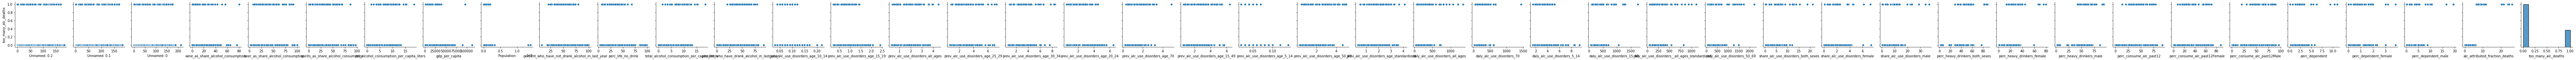

In [460]:
sns.pairplot(train, y_vars = 'too_many_alc_deaths')

In [ ]:
sns.pairplot

In [332]:
model = sm.logit(formula = "too_many_alc_deaths~prev_alc_use_disorders_age_50_69+prev_alc_use_disorders_age_30_34+prev_alc_use_disorders_age_15_49+prev_alc_use_disorders_age_25_29+prev_alc_use_disorders_age_20_24+prev_alc_use_disorders_age_15_19+prev_alc_use_disorders_age_10_14+prev_alc_use_disorders_age_5_14", data = train_75).fit()
confusion_matrix_data(train_25, train_25['too_many_alc_deaths'], model)

Optimization terminated successfully.
         Current function value: 0.421905
         Iterations 8
Classification accuracy = 75.6%
Precision = 100.0%
TPR or Recall = 15.4%
FNR = 84.6%
FPR = 0.0%


In [313]:
columns = train.columns.values.tolist()
columns.remove('Unnamed: 0.2')
columns.remove('Unnamed: 0.1')
columns.remove('Unnamed: 0')
columns.remove('Country')
columns.remove('alc_attributed_fraction_deaths')
columns.remove("too_many_alc_deaths")
columns.remove("Region")
columns.remove("gdp_per_capita")
columns.remove("Population")
columns

['wine_as_share_alcohol_consumption',
 'beer_as_share_alcohol_consumption',
 'spirits_as_share_alcohol_consumption',
 'tot_alcohol_consumption_per_capita_liters',
 'percent_who_have_not_drank_alcohol_in_last_year',
 'perc_life_no_drink',
 'total_alcohol_consumption_per_capita_liters',
 'percent_who_have_drank_alcohol_in_last_year',
 'prev_alc_use_disorders_age_10_14',
 'prev_alc_use_disorders_age_15_19',
 'prev_alc_use_disorders_all_ages',
 'prev_alc_use_disorders_age_25_29',
 'prev_alc_use_disorders_age_30_34',
 'prev_alc_use_disorders_age_20_24',
 'prev_alc_use_disorders_age_70',
 'prev_alc_use_disorders_age_15_49',
 'prev_alc_use_disorders_age_5_14',
 'prev_alc_use_disorders_age_50_69',
 'prev_alc_use_disorders_age_standardized',
 'daly_alc_use_disorders_all_ages',
 'daly_alc_use_disorders_70',
 'daly_alc_use_disorders_5_14',
 'daly_alc_use_disorders_15_49',
 'daly_alc_use_disorders__all_ages_standardized',
 'daly_alc_use_disorders_50_69',
 'share_alc_use_disorders_both_sexes',
 'sh

In [335]:
train_75 = train.sample(frac = 0.75)
train_25 = train.drop(train_75.index)

In [467]:
model = sm.logit(formula = "too_many_alc_deaths~" + "+".join([str(x) for x in columns]), data = train_75).fit()
confusion_matrix_data(train_25, train_25['too_many_alc_deaths'], model)

Optimization terminated successfully.
         Current function value: 0.159880
         Iterations 26
Classification accuracy = 70.0%
Precision = 52.9%
TPR or Recall = 69.2%
FNR = 30.8%
FPR = 29.6%


In [422]:
model = sm.logit(formula = "too_many_alc_deaths~wine_as_share_alcohol_consumption+beer_as_share_alcohol_consumption+spirits_as_share_alcohol_consumption", data = train_75).fit()
confusion_matrix_data(train_25, train_25['too_many_alc_deaths'], model)
model.summary()

Optimization terminated successfully.
         Current function value: 0.601647
         Iterations 5
Classification accuracy = 68.9%
Precision = nan%
TPR or Recall = 0.0%
FNR = 100.0%
FPR = 0.0%


/var/folders/qt/k0htg86j0pggglj722zn7vjm0000gn/T/ipykernel_10881/2203872068.py:15: RuntimeWarning: invalid value encountered in double_scalars
  precision = (cm[1,1])/(cm[0,1]+cm[1,1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                           
===============================================================================
Dep. Variable:     too_many_alc_deaths   No. Observations:                  127
Model:                           Logit   Df Residuals:                      123
Method:                            MLE   Df Model:                            3
Date:                 Thu, 02 Mar 2023   Pseudo R-squ.:                 0.01401
Time:                         21:32:49   Log-Likelihood:                -76.409
converged:                        True   LL-Null:                       -77.495
Covariance Type:             nonrobust   LLR p-value:                    0.5376
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                               -1.8564      1.057     -1.756      0.079      -3.928       0.215
wine_as_share_alcohol_consumption        0.0003      0.015      0.017      0.986      -0.029       0.029
beer_as_share_alcohol_consumption        0.0139      0.013      1.097      0.273      -0.011       0.039
spirits_as_share_alcohol_consumption     0.0121      0.012      1.012      0.311      -0.011       0.036
========================================================================================================
"""

In [423]:
model = sm.logit(formula = "too_many_alc_deaths~prev_alc_use_disorders_age_5_14+prev_alc_use_disorders_age_15_19+prev_alc_use_disorders_age_20_24+prev_alc_use_disorders_age_25_29+prev_alc_use_disorders_age_30_34+prev_alc_use_disorders_age_50_69+prev_alc_use_disorders_age_70", data = train_75).fit()
# confusion_matrix_data(train_25, train_25['too_many_alc_deaths'], model)
model.summary()

Optimization terminated successfully.
         Current function value: 0.481842
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                           
===============================================================================
Dep. Variable:     too_many_alc_deaths   No. Observations:                  136
Model:                           Logit   Df Residuals:                      128
Method:                            MLE   Df Model:                            7
Date:                 Thu, 02 Mar 2023   Pseudo R-squ.:                  0.1866
Time:                         21:32:52   Log-Likelihood:                -65.531
converged:                        True   LL-Null:                       -80.566
Covariance Type:             nonrobust   LLR p-value:                 9.216e-05
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                           -1.5292      0.741     -2.064      0.039      -2.981      -0.077
prev_alc_use_disorders_age_5_14    -55.9296     39.359     -1.421      0.155    -133.073      21.214
prev_alc_use_disorders_age_15_19     7.7617      9.143      0.849      0.396     -10.157      25.681
prev_alc_use_disorders_age_20_24    -4.0163      5.916     -0.679      0.497     -15.612       7.579
prev_alc_use_disorders_age_25_29     0.5853      6.376      0.092      0.927     -11.911      13.082
prev_alc_use_disorders_age_30_34     0.9115      3.716      0.245      0.806      -6.372       8.195
prev_alc_use_disorders_age_50_69     0.7215      0.549      1.315      0.189      -0.354       1.797
prev_alc_use_disorders_age_70       -0.0938      0.683     -0.137      0.891      -1.433       1.245
====================================================================================================
"""

In [419]:
model = sm.logit(formula = "too_many_alc_deaths~daly_alc_use_disorders_5_14+daly_alc_use_disorders_15_49+daly_alc_use_disorders_50_69+daly_alc_use_disorders_70", data = train).fit()
confusion_matrix_data(train, train['too_many_alc_deaths'], model)
model.summary()

Optimization terminated successfully.
         Current function value: 0.481532
         Iterations 7
Classification accuracy = 78.6%
Precision = 78.3%
TPR or Recall = 34.6%
FNR = 65.4%
FPR = 3.8%


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                           
===============================================================================
Dep. Variable:     too_many_alc_deaths   No. Observations:                  182
Model:                           Logit   Df Residuals:                      177
Method:                            MLE   Df Model:                            4
Date:                 Thu, 02 Mar 2023   Pseudo R-squ.:                  0.1951
Time:                         21:32:33   Log-Likelihood:                -87.639
converged:                        True   LL-Null:                       -108.89
Covariance Type:             nonrobust   LLR p-value:                 1.319e-08
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -0.9455      0.508     -1.862      0.063      -1.940       0.050
daly_alc_use_disorders_5_14     -0.6222      0.219     -2.841      0.005      -1.051      -0.193
daly_alc_use_disorders_15_49     0.0058      0.002      2.446      0.014       0.001       0.011
daly_alc_use_disorders_50_69     0.0010      0.002      0.556      0.578      -0.003       0.005
daly_alc_use_disorders_70       -0.0005      0.003     -0.162      0.872      -0.007       0.006
================================================================================================
"""

In [471]:
model = sm.logit(formula = "too_many_alc_deaths~daly_alc_use_disorders_15_49+total_alcohol_consumption_per_capita_liters+perc_heavy_drinkers_female*perc_heavy_drinkers_male*perc_heavy_drinkers_both_sexes+share_alc_use_disorders_both_sexes+perc_dependent+total_alcohol_consumption_per_capita_liters", data = train_75).fit()
confusion_matrix_data(train_25, train_25['too_many_alc_deaths'], model)
model.summary()

Optimization terminated successfully.
         Current function value: 0.302531
         Iterations 11
Classification accuracy = 90.7%
Precision = 90.9%
TPR or Recall = 76.9%
FNR = 23.1%
FPR = 3.3%


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                           
===============================================================================
Dep. Variable:     too_many_alc_deaths   No. Observations:                  118
Model:                           Logit   Df Residuals:                      106
Method:                            MLE   Df Model:                           11
Date:                 Sat, 04 Mar 2023   Pseudo R-squ.:                  0.4747
Time:                         12:51:52   Log-Likelihood:                -35.699
converged:                        True   LL-Null:                       -67.953
Covariance Type:             nonrobust   LLR p-value:                 1.333e-09
======================================================================================================================================================
                                                                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                            -52.1405     20.196     -2.582      0.010     -91.725     -12.556
daly_alc_use_disorders_15_49                                                           0.0021      0.002      1.307      0.191      -0.001       0.005
total_alcohol_consumption_per_capita_liters                                            0.3841      0.163      2.351      0.019       0.064       0.704
perc_heavy_drinkers_female                                                           -23.0932      9.905     -2.332      0.020     -42.506      -3.680
perc_heavy_drinkers_male                                                               5.2355      2.236      2.342      0.019       0.854       9.617
perc_heavy_drinkers_female:perc_heavy_drinkers_male                                    0.1892      0.082      2.320      0.020       0.029       0.349
perc_heavy_drinkers_both_sexes                                                         2.1634      0.790      2.740      0.006       0.616       3.711
perc_heavy_drinkers_female:perc_heavy_drinkers_both_sexes                              0.3613      0.195      1.848      0.065      -0.022       0.744
perc_heavy_drinkers_male:perc_heavy_drinkers_both_sexes                               -0.1075      0.048     -2.254      0.024      -0.201      -0.014
perc_heavy_drinkers_female:perc_heavy_drinkers_male:perc_heavy_drinkers_both_sexes    -0.0028      0.002     -1.827      0.068      -0.006       0.000
share_alc_use_disorders_both_sexes                                                    -0.1194      0.245     -0.488      0.626      -0.599       0.360
perc_dependent                                                                         0.6710      0.493      1.360      0.174      -0.296       1.638
======================================================================================================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [397]:
abs(train.corrwith(train['too_many_alc_deaths'])).sort_values(ascending = False)

too_many_alc_deaths                                1.000000
alc_attributed_fraction_deaths                     0.655563
total_alcohol_consumption_per_capita_liters        0.453060
tot_alcohol_consumption_per_capita_liters          0.447922
share_alc_use_disorders_male                       0.416365
perc_heavy_drinkers_female                         0.415058
daly_alc_use_disorders_50_69                       0.408540
daly_alc_use_disorders_all_ages                    0.405293
prev_alc_use_disorders_age_50_69                   0.404603
daly_alc_use_disorders__all_ages_standardized      0.402697
daly_alc_use_disorders_15_49                       0.399031
perc_heavy_drinkers_male                           0.398390
perc_heavy_drinkers_both_sexes                     0.392347
share_alc_use_disorders_both_sexes                 0.382273
prev_alc_use_disorders_age_70                      0.377033
perc_dependent_male                                0.358100
prev_alc_use_disorders_all_ages         

<AxesSubplot:xlabel='total_alcohol_consumption_per_capita_liters', ylabel='too_many_alc_deaths'>

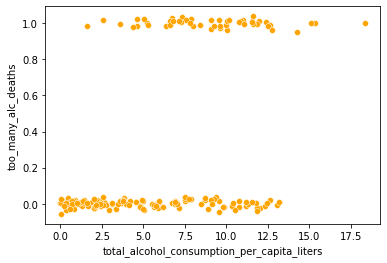

In [458]:
def jitter(values,j):
    return values + np.random.normal(j,0.02,values.shape)
sns.scatterplot(x = jitter(train.total_alcohol_consumption_per_capita_liters,0), y = jitter(train.too_many_alc_deaths,0), data = train, color = 'orange')

<AxesSubplot:ylabel='hi_percent'>

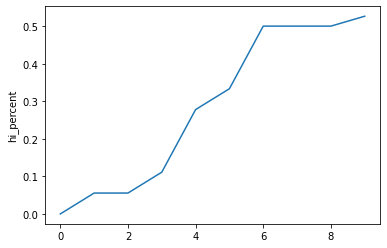

In [504]:
binned_age = pd.qcut(train['total_alcohol_consumption_per_capita_liters'],10,retbins=True)
train['total_alcohol_consumption_per_capita_liters_binned'] = binned_age[0]
new_data = train.groupby('total_alcohol_consumption_per_capita_liters_binned')['too_many_alc_deaths'].agg([('hi_percent','mean'),('nobs','count')]).reset_index(drop=False)
sns.lineplot(x = new_data.index, y= new_data['hi_percent'])

In [505]:
#Creating a function to bin age so that it can be applied to both the test and train datasets
def var_transform(data):
    binned_total_alcohol_consumption_per_capita_liters = pd.qcut(train['total_alcohol_consumption_per_capita_liters'],10,retbins=True)
    bins = binned_total_alcohol_consumption_per_capita_liters[1]
    data['total_alcohol_consumption_per_capita_liters_binned'] = pd.cut(data['total_alcohol_consumption_per_capita_liters'],bins = bins)
    dum = pd.get_dummies(data.total_alcohol_consumption_per_capita_liters_binned,drop_first = True)
    dum.columns = ['total_alcohol_consumption_per_capita_liters'+str(x) for x in range(1,len(bins)-1)]
    data = pd.concat([data,dum], axis = 1)
    return data
train = var_transform(train)

In [506]:
model = sm.logit(formula = "too_many_alc_deaths~" + '+'.join(['total_alcohol_consumption_per_capita_liters'+str(x) for x in range(1,10)]) + "+daly_alc_use_disorders_15_49+total_alcohol_consumption_per_capita_liters+perc_heavy_drinkers_female*perc_heavy_drinkers_male*perc_heavy_drinkers_both_sexes+share_alc_use_disorders_both_sexes+perc_dependent+total_alcohol_consumption_per_capita_liters", data = train).fit(method='bfgs')
confusion_matrix_data(train, train['too_many_alc_deaths'], model)
model.summary()

         Current function value: 0.693147
         Iterations: 0
         Function evaluations: 15
         Gradient evaluations: 3
Classification accuracy = 27.3%
Precision = 27.3%
TPR or Recall = 100.0%
FNR = 0.0%
FPR = 100.0%


/Users/jacobmuriel/opt/anaconda3/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/jacobmuriel/opt/anaconda3/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Users/jacobmuriel/opt/anaconda3/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/jacobmuriel/opt/anaconda3/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Users/jacobmuriel/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimizati

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                           
===============================================================================
Dep. Variable:     too_many_alc_deaths   No. Observations:                  161
Model:                           Logit   Df Residuals:                      140
Method:                            MLE   Df Model:                           20
Date:                 Sat, 04 Mar 2023   Pseudo R-squ.:                 -0.1818
Time:                         14:33:52   Log-Likelihood:                -111.60
converged:                       False   LL-Null:                       -94.427
Covariance Type:             nonrobust   LLR p-value:                     1.000
======================================================================================================================================================
                                                                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                   0      0.822          0      1.000      -1.611       1.611
total_alcohol_consumption_per_capita_liters1                                                0      0.796          0      1.000      -1.561       1.561
total_alcohol_consumption_per_capita_liters2                                                0      0.974          0      1.000      -1.909       1.909
total_alcohol_consumption_per_capita_liters3                                                0      1.178          0      1.000      -2.309       2.309
total_alcohol_consumption_per_capita_liters4                                                0      1.506          0      1.000      -2.951       2.951
total_alcohol_consumption_per_capita_liters5                                                0      1.830          0      1.000      -3.586       3.586
total_alcohol_consumption_per_capita_liters6                                                0      2.100          0      1.000      -4.117       4.117
total_alcohol_consumption_per_capita_liters7                                                0      2.481          0      1.000      -4.863       4.863
total_alcohol_consumption_per_capita_liters8                                                0      2.901          0      1.000      -5.685       5.685
total_alcohol_consumption_per_capita_liters9                                                0      3.414          0      1.000      -6.692       6.692
daly_alc_use_disorders_15_49                                                                0      0.001          0      1.000      -0.002       0.002
total_alcohol_consumption_per_capita_liters                                                 0      0.255          0      1.000      -0.500       0.500
perc_heavy_drinkers_female                                                                  0      3.855          0      1.000      -7.557       7.557
perc_heavy_drinkers_male                                                                    0      0.825          0      1.000      -1.617       1.617
perc_heavy_drinkers_female:perc_heavy_drinkers_male                                         0      0.033          0      1.000      -0.065       0.065
perc_heavy_drinkers_both_sexes                                                              0      0.255          0      1.000      -0.501       0.501
perc_heavy_drinkers_female:perc_heavy_drinkers_both_sexes                                   0      0.081          0      1.000      -0.160       0.160
perc_heavy_drinkers_male:perc_heavy_drinkers_both_sexes                                     0      0.019          0      1.000      -0.037       0.037
perc_heavy_drinkers_female:perc_heavy_drinkers_male:perc_heav

### Data quality check
*By Elton John*

The code below visualizes the distribution of all the variables in the dataset, and their association with the response.

In [7]:
#...Distribution of continuous variables...#

In [8]:
#...Distribution of categorical variables...#

In [9]:
#...Association of the response with the predictors...#

### Data cleaning
*By Xena Valenzuela*

From the data quality check we realized that:

1. Some of the columns that should have contained only numeric values, specifically <>, <>, and <> have special characters such as \*, #, %. We'll removes these characters, and convert the datatype of these columns to numeric.

2. Some of the columns have more than 60% missing values, and it is very difficult to impute their values, as the values seem to be missing at random with negligible association with other predictors. We'll remove such columns from the data.

3. The column `number_of_bedrooms` has some unreasonably high values such as 15. As our data consist of single-family homes in Evanston, we suspect that any value greater than 5 may be incorrect. We'll replace all values that are greater than 5 with an estimate obtained using the $K$-nearest neighbor approach.

4. The columns `house_price` has some unreasonably high values. We'll tag all values greater than 1 billion dollars as "potentially incorrect observation", to see if they distort our prediction / inference later on.

The code below implements the above cleaning.

In [ ]:
#...Code with comments...#

### Data preparation
*By Sankaranarayanan Balasubramanian and Chun-Li*

The following data preparation steps helped us to prepare our data for implementing various modeling / validation techniques:

1. Since we need to predict house price, we derived some new predictors *(from existing predictors)* that intuitively seem to be helpuful to predict house price. 

2. We have shuffled the dataset to prepare it for K-fold cross validation.

3. We have created a standardized version of the dataset, as we will use it to develop Lasso / Ridge regression models.

In [3]:
######---------------Creating new predictors----------------#########

#Creating number of bedrooms per unit floor area

#Creating ratio of bathrooms to bedrooms

#Creating ratio of carpet area to floor area

In [ ]:
######-----------Shuffling the dataset for K-fold------------#########

In [ ]:
######-----Standardizing the dataset for Lasso / Ridge-------#########

## Exploratory data analysis

Put code with comments. The comments should explain the code such that it can be easily understood. You may put text *(in a markdown cell)* before a large chunk of code to explain the overall purpose of the code, if it is not intuitive. **Put the name of the person / persons who contributed to each code chunk / set of code chunks.**

## Developing the model

Put code with comments. The comments should explain the code such that it can be easily understood. You may put text *(in a markdown cell)* before a large chunk of code to explain the overall purpose of the code, if it is not intuitive. **Put the name of the person / persons who contributed to each code chunk / set of code chunks.**

### Code fitting the final model

Put the code(s) that fit the final model(s) in separate cell(s), i.e., the code with the `.ols()` or `.logit()` functions.

## Conclusions and Recommendations to stakeholder(s)

You may or may not have code to put in this section. Delete this section if it is irrelevant.